<a href="https://colab.research.google.com/github/jcarey-shu/dissertation/blob/main/pizd_with_whois_imptr_gscv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load 3 👇 : pizd WHOIS imptr GridSearchCV SHU. Train & Test.

### Load 3 = 1000 legit domains; 1000 pizd word-based DGAs; my top 10 correlated features; with WHOIS history using iterative imputer to replace NaN. GridSearchCV applied. Train & Test.

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

def load_data1():
  return pd.read_csv(Path("/content/gdrive/MyDrive/Colab/Data/loads/raw_data/pizd.1000+whois-history.csv"))

df1 = load_data1()

Mounted at /content/gdrive


In [ ]:
display(df1)

,domain,nlp_1g_25p,nlp_1g_50p,nlp_1g_75p,nlp_1g_cov,nlp_1g_dist,nlp_1g_dst_ca,nlp_1g_dst_ch,nlp_1g_dst_em,nlp_1g_dst_eu,...,nlp_r_num_odn,nlp_r_sym_2dn,nlp_r_sym_fqdn,nlp_r_sym_odn,nlp_r_vow_2dn,nlp_r_vow_fqdn,nlp_r_vow_odn,whois_rec,whois_change,class
0,abovefamous.net,0.0,0.0,0.071429,0.001388,11.0,31.120288,0.141997,8.442562,0.309753,...,0.0,0.0,0.066667,0.0,0.545455,0.466667,0.0,0,NaN,1
1,abovegentleman.net,0.0,0.0,0.058824,0.001634,10.0,31.984155,0.234434,10.077016,0.373578,...,0.0,0.0,0.055556,0.0,0.428571,0.388889,0.0,0,NaN,1
2,abovehistory.net,0.0,0.0,0.066667,0.001306,12.0,31.289778,0.132473,6.211085,0.289615,...,0.0,0.0,0.062500,0.0,0.416667,0.375000,0.0,0,NaN,1
3,aboveincrease.net,0.0,0.0,0.062500,0.001560,11.0,32.016142,0.249140,10.308634,0.376572,...,0.0,0.0,0.058824,0.0,0.538462,0.470588,0.0,0,NaN,1
4,abovelanguage.net,0.0,0.0,0.062500,0.001564,10.0,32.442230,0.186640,10.746134,0.378965,...,0.0,0.0,0.058824,0.0,0.538462,0.470588,0.0,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,exceptspring.net,0.0,0.0,0.066667,0.001553,10.0,33.424087,0.199140,6.634204,0.378226,...,0.0,0.0,0.062500,0.0,0.250000,0.250000,0.0,0,NaN,1
952,exceptstreet.net,0.0,0.0,0.000000,0.001893,8.0,33.299863,0.332473,5.767537,0.468167,...,0.0,0.0,0.062500,0.0,0.333333,0.312500,0.0,0,NaN,1
953,exceptsuppose.net,0.0,0.0,0.046875,0.001711,9.0,32.845029,0.249140,5.296704,0.398154,...,0.0,0.0,0.058824,0.0,0.384615,0.352941,0.0,0,NaN,1
954,exceptwonder.net,0.0,0.0,0.066667,0.001646,10.0,32.530400,0.265807,6.825321,0.382642,...,0.0,0.0,0.062500,0.0,0.333333,0.312500,0.0,0,NaN,1


#### Code block below uses Iterative Imputer to replace NaN in whois_change col

In [ ]:
df1.drop(df1.columns.difference(['nlp_l_2dn','nlp_3g_dist','nlp_l_fqdn','nlp_1g_e','nlp_2g_dist', \
                                 'nlp_2g_ken','nlp_2g_spe','nlp_3g_ken','nlp_3g_spe','nlp_3g_sumsq', \
                                 'whois_rec','whois_change','class']), axis=1, inplace=True)


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

df1_1 = df1[['nlp_l_2dn','nlp_3g_dist','nlp_l_fqdn','nlp_1g_e','nlp_2g_dist', \
             'nlp_2g_ken','nlp_2g_spe','nlp_3g_ken','nlp_3g_spe','nlp_3g_sumsq', \
             'whois_rec','whois_change','class']]

imptr = IterativeImputer(BayesianRidge())

df1_2 = pd.DataFrame(imptr.fit_transform(df1_1), columns = df1_1.columns)

In [ ]:
display(df1_2)

,nlp_l_2dn,nlp_3g_dist,nlp_l_fqdn,nlp_1g_e,nlp_2g_dist,nlp_2g_ken,nlp_2g_spe,nlp_3g_ken,nlp_3g_spe,nlp_3g_sumsq,whois_rec,whois_change,class
0,11.0,12.0,15.0,3.292794,13.0,0.156742,0.180071,0.045041,0.046527,12.0,0.0,0.742392,1.0
1,14.0,15.0,18.0,4.401881,16.0,0.173686,0.199537,0.050356,0.052018,15.0,0.0,0.738102,1.0
2,12.0,13.0,16.0,3.745962,14.0,0.162595,0.186796,0.046880,0.048427,13.0,0.0,0.740958,1.0
3,13.0,14.0,17.0,4.342247,15.0,0.168236,0.193276,0.048649,0.050254,14.0,0.0,0.739518,1.0
4,13.0,14.0,17.0,3.856742,15.0,0.168236,0.193276,0.048649,0.050254,14.0,0.0,0.739541,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,12.0,13.0,16.0,3.605330,14.0,0.162595,0.186796,0.046880,0.048427,13.0,0.0,0.740965,1.0
952,12.0,13.0,16.0,4.194205,13.0,0.156798,0.180072,0.046880,0.048427,13.0,0.0,0.741104,1.0
953,13.0,14.0,17.0,3.855866,15.0,0.168236,0.193276,0.048649,0.050254,14.0,0.0,0.739541,1.0
954,12.0,13.0,16.0,3.770244,14.0,0.162595,0.186796,0.046880,0.048427,13.0,0.0,0.740957,1.0


In [ ]:
df1_2.describe()

,nlp_l_2dn,nlp_3g_dist,nlp_l_fqdn,nlp_1g_e,nlp_2g_dist,nlp_2g_ken,nlp_2g_spe,nlp_3g_ken,nlp_3g_spe,nlp_3g_sumsq,whois_rec,whois_change,class
count,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.0
mean,12.713389,13.662134,16.713389,4.066797,14.155858,0.163255,0.187519,0.047982,0.049565,13.817992,2.123431,0.741236,1.0
std,1.530653,1.552525,1.530653,0.463643,1.589816,0.009062,0.010421,0.002708,0.002798,1.719713,6.049312,0.381351,0.0
min,10.000000,8.000000,14.000000,2.936228,8.000000,0.123240,0.141535,0.036778,0.037991,11.000000,0.000000,0.000000,1.0
25%,12.000000,13.000000,16.000000,3.755174,13.000000,0.156798,0.180072,0.046880,0.048427,13.000000,0.000000,0.738122,1.0
50%,13.000000,14.000000,17.000000,4.021352,14.000000,0.162595,0.186796,0.048649,0.050254,14.000000,0.000000,0.739846,1.0
75%,14.000000,15.000000,18.000000,4.340148,15.000000,0.168236,0.193276,0.050356,0.052018,15.000000,0.000000,0.742361,1.0
max,19.000000,20.000000,23.000000,5.887734,20.000000,0.193955,0.222742,0.058143,0.060062,26.000000,49.000000,4.000000,1.0


In [ ]:
def load_data2():
  return pd.read_csv(Path("/content/gdrive/MyDrive/Colab/Data/loads/raw_data/tranco.1000+whois-history.csv"))

df2 = load_data2()

df2.drop(df2.columns.difference(['nlp_l_2dn','nlp_3g_dist','nlp_l_fqdn','nlp_1g_e','nlp_2g_dist', \
                                 'nlp_2g_ken','nlp_2g_spe','nlp_3g_ken','nlp_3g_spe','nlp_3g_sumsq', \
                                 'whois_rec','whois_change','class']), axis=1, inplace=True)

In [ ]:
df2.describe()

,nlp_1g_e,nlp_2g_dist,nlp_2g_ken,nlp_2g_spe,nlp_3g_dist,nlp_3g_ken,nlp_3g_spe,nlp_3g_sumsq,nlp_l_2dn,nlp_l_fqdn,whois_rec,whois_change,class
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.0
mean,2.170840,8.746493,0.126887,0.145765,7.868737,0.035774,0.036954,7.952906,6.690381,10.981964,28.958918,0.443888,0.0
std,0.820674,2.978839,0.021753,0.024986,3.056113,0.007118,0.007353,3.190505,3.194988,3.122326,9.375340,0.977355,0.0
min,0.482578,2.000000,0.061742,0.070932,1.000000,0.013004,0.013433,1.000000,1.000000,4.000000,2.000000,0.000000,0.0
25%,1.570859,7.000000,0.115286,0.132445,6.000000,0.031851,0.032902,6.000000,4.000000,9.000000,24.000000,0.000000,0.0
50%,2.072205,9.000000,0.130620,0.150061,8.000000,0.036778,0.037991,8.000000,6.000000,11.000000,28.000000,0.000000,0.0
75%,2.660217,10.000000,0.137680,0.158118,10.000000,0.041118,0.042474,10.000000,9.000000,13.000000,33.000000,0.000000,0.0
max,5.147269,19.000000,0.189118,0.217187,19.000000,0.056671,0.058541,22.000000,18.000000,22.000000,110.000000,4.000000,0.0


In [ ]:
data_load = [df1_2, df2]
df = pd.concat(data_load).reset_index(drop=True)

In [ ]:
display(df)

,nlp_l_2dn,nlp_3g_dist,nlp_l_fqdn,nlp_1g_e,nlp_2g_dist,nlp_2g_ken,nlp_2g_spe,nlp_3g_ken,nlp_3g_spe,nlp_3g_sumsq,whois_rec,whois_change,class
0,11.0,12.0,15.0,3.292794,13.0,0.156742,0.180071,0.045041,0.046527,12.0,0.0,0.742392,1.0
1,14.0,15.0,18.0,4.401881,16.0,0.173686,0.199537,0.050356,0.052018,15.0,0.0,0.738102,1.0
2,12.0,13.0,16.0,3.745962,14.0,0.162595,0.186796,0.046880,0.048427,13.0,0.0,0.740958,1.0
3,13.0,14.0,17.0,4.342247,15.0,0.168236,0.193276,0.048649,0.050254,14.0,0.0,0.739518,1.0
4,13.0,14.0,17.0,3.856742,15.0,0.168236,0.193276,0.048649,0.050254,14.0,0.0,0.739541,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,6.0,7.0,10.0,1.621124,8.0,0.123198,0.141534,0.034403,0.035538,7.0,22.0,0.000000,0.0
1950,10.0,11.0,14.0,2.580115,12.0,0.150651,0.173074,0.043124,0.044547,11.0,19.0,0.000000,0.0
1951,4.0,5.0,8.0,1.354726,6.0,0.106775,0.122667,0.029076,0.030036,5.0,35.0,0.000000,0.0
1952,3.0,6.0,10.0,1.500263,7.0,0.115286,0.132445,0.031851,0.032902,6.0,13.0,1.000000,0.0


In [ ]:
df.isnull().sum().sort_values(ascending=False)

nlp_l_2dn       0
nlp_3g_dist     0
nlp_l_fqdn      0
nlp_1g_e        0
nlp_2g_dist     0
nlp_2g_ken      0
nlp_2g_spe      0
nlp_3g_ken      0
nlp_3g_spe      0
nlp_3g_sumsq    0
whois_rec       0
whois_change    0
class           0
dtype: int64

In [ ]:
df.dropna(how="any", inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 1953
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nlp_l_2dn     1954 non-null   float64
 1   nlp_3g_dist   1954 non-null   float64
 2   nlp_l_fqdn    1954 non-null   float64
 3   nlp_1g_e      1954 non-null   float64
 4   nlp_2g_dist   1954 non-null   float64
 5   nlp_2g_ken    1954 non-null   float64
 6   nlp_2g_spe    1954 non-null   float64
 7   nlp_3g_ken    1954 non-null   float64
 8   nlp_3g_spe    1954 non-null   float64
 9   nlp_3g_sumsq  1954 non-null   float64
 10  whois_rec     1954 non-null   float64
 11  whois_change  1954 non-null   float64
 12  class         1954 non-null   float64
dtypes: float64(13)
memory usage: 213.7 KB


In [ ]:
X, y = df.iloc[:, :-1], df.iloc[:, -1] # the last column is the target

In [ ]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(X)

# Generate train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)



In [ ]:
IMAGES_PATH = Path() / "gdrive" / "MyDrive" / "Colab" / "Data" / "images" /"pizd"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=600):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
df.describe()

,nlp_l_2dn,nlp_3g_dist,nlp_l_fqdn,nlp_1g_e,nlp_2g_dist,nlp_2g_ken,nlp_2g_spe,nlp_3g_ken,nlp_3g_spe,nlp_3g_sumsq,whois_rec,whois_change,class
count,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000
mean,9.637155,10.703173,13.786080,3.098443,11.393040,0.144680,0.166194,0.041747,0.043124,10.822416,15.829580,0.589366,0.489253
std,3.927645,3.786537,3.786181,1.160882,3.616834,0.024747,0.028420,0.008168,0.008438,3.904215,15.582367,0.762140,0.500012
min,1.000000,1.000000,4.000000,0.482578,2.000000,0.061742,0.070932,0.013004,0.013433,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,11.000000,2.055232,8.000000,0.123240,0.141535,0.036778,0.037991,8.000000,0.000000,0.000000,0.000000
50%,11.000000,12.000000,15.000000,3.420324,12.000000,0.150705,0.173075,0.045041,0.046527,12.000000,17.000000,0.738105,0.000000
75%,13.000000,14.000000,17.000000,4.036824,14.000000,0.162654,0.186796,0.048649,0.050254,14.000000,29.000000,0.741276,1.000000
max,19.000000,20.000000,23.000000,5.887734,20.000000,0.193955,0.222742,0.058143,0.060062,26.000000,110.000000,4.000000,1.000000


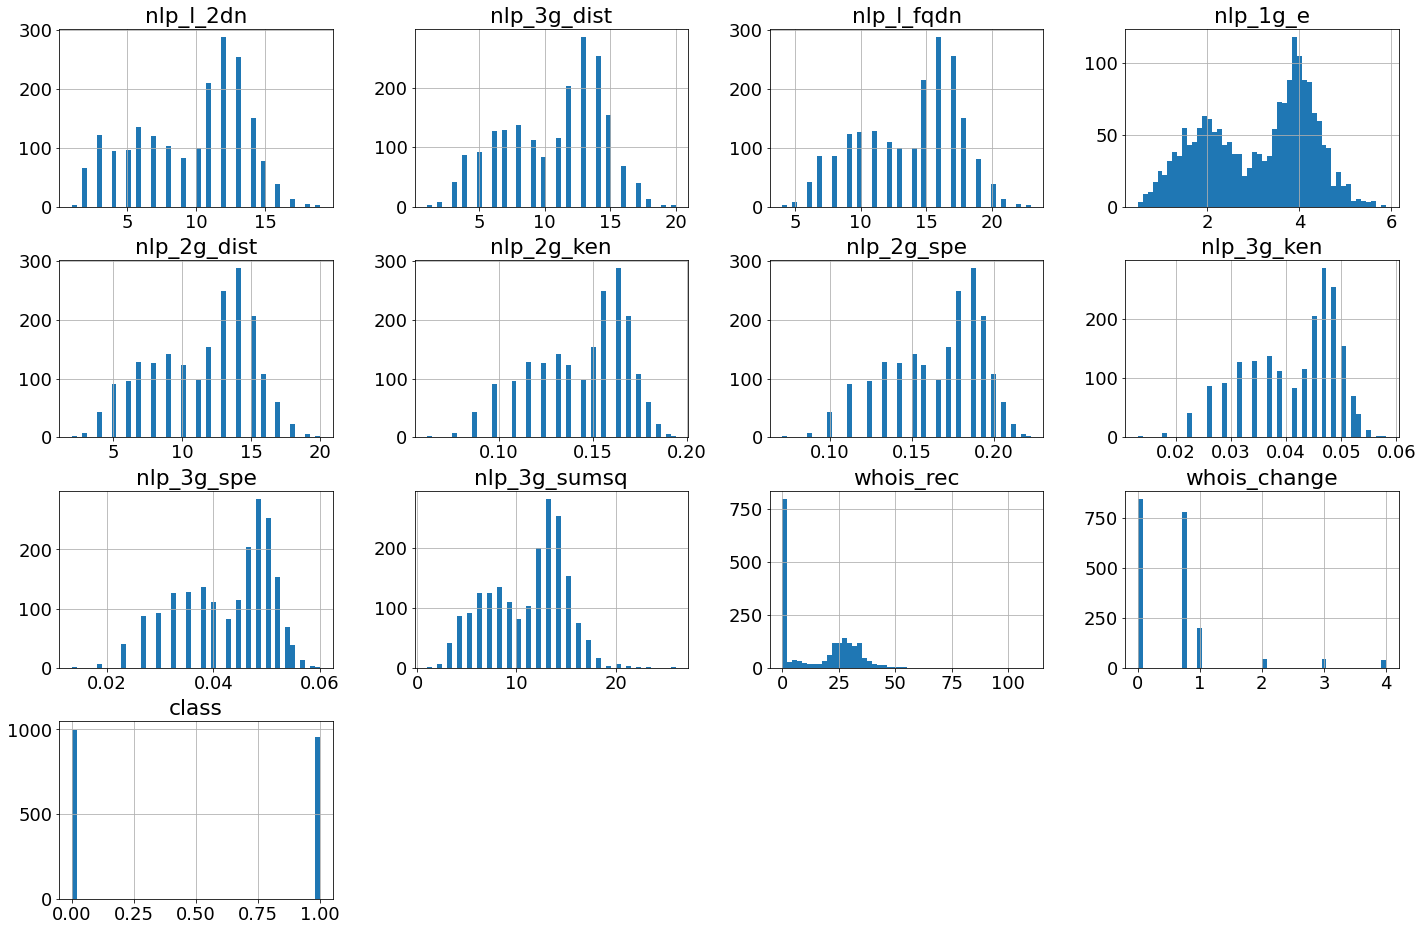

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(24, 16))
plt.show()

### Naive Bayes (NB) classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb_clf = MultinomialNB()
mnb_clf.fit(X_train, y_train)


MultinomialNB()

In [ ]:
print(f"Naive Bayes scored {mnb_clf.score(X_test, y_test).round(5)} on test")
print(f"Naive Bayes scored {mnb_clf.score(X_train, y_train).round(5)} on train")

Naive Bayes scored 0.97445 on test
Naive Bayes scored 0.96854 on train


#### Confusion Matrix for mnb_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(mnb_clf, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred).round(5)
cm

array([[696,   8],
       [ 35, 628]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.98742

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.94721

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.9669

<function matplotlib.pyplot.show(*args, **kw)>

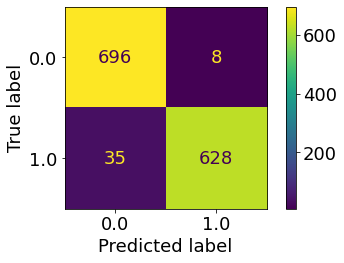

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("pizd_+whois_mnb_train_cm")
plt.show

#### Confusion Matrix for mnb_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(mnb_clf, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred).round(5)
cm

array([[292,   2],
       [ 14, 279]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.99288

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.95222

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.97213

<function matplotlib.pyplot.show(*args, **kw)>

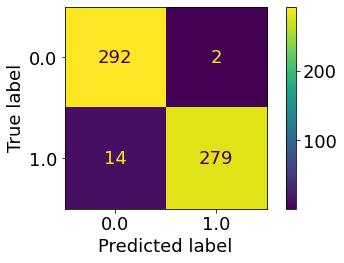

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("pizd_+whois_mnb_test_cm")
plt.show

### Logistic Regression (LG) classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

lg_clf = LogisticRegression(max_iter=1000)
lg_clf.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
print(f"Logistic Regression scored {lg_clf.score(X_test, y_test).round(5)} on test")
print(f"Logistic Regression scored {lg_clf.score(X_train, y_train).round(5)} on train")

Logistic Regression scored 0.97615 on test
Logistic Regression scored 0.97805 on train


#### Confusion Matrix for lg_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(lg_clf, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[691,  13],
       [ 20, 643]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.98018

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.96983

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.97498

<function matplotlib.pyplot.show(*args, **kw)>

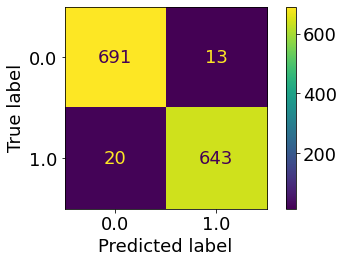

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("pizd_+whois_lg_train_cm")
plt.show

#### Confusion Matrix for lg_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(lg_clf, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[291,   3],
       [ 11, 282]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.98947

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.96246

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.97578

<function matplotlib.pyplot.show(*args, **kw)>

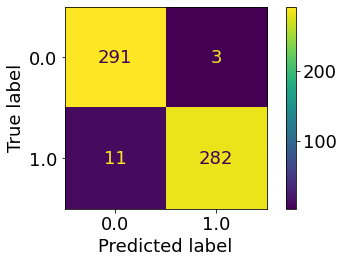

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("pizd_+whois_lg_test_cm")
plt.show

### K-Nearest Neighbours (KNN) classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn_clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='brute', n_jobs=-1)

In [ ]:
print(f"K-Nearest Neighbours scored {knn_clf.score(X_test, y_test).round(5)} on test")
print(f"K-Nearest Neighbours scored {knn_clf.score(X_train, y_train).round(5)} on train")

K-Nearest Neighbours scored 0.97445 on test
K-Nearest Neighbours scored 0.98171 on train


#### Confusion Matrix for knn_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[692,  12],
       [ 22, 641]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.98162

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.96682

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.97416

<function matplotlib.pyplot.show(*args, **kw)>

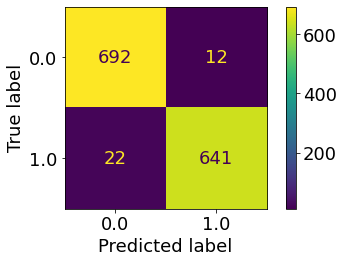

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("pizd_+whois_knn_train_cm")
plt.show

#### Confusion Matrix for knn_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(knn_clf, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[290,   4],
       [ 10, 283]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.98606

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.96587

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.97586

<function matplotlib.pyplot.show(*args, **kw)>

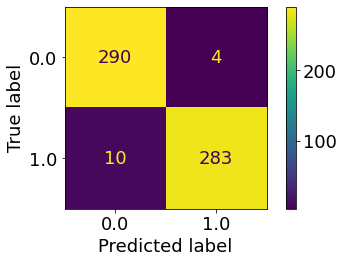

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("pizd_+whois_knn_test_cm")
plt.show

###✋Support Vector Machine (SVM) classifier

In [ ]:
# if we receive ConvergenceWarning then use:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_norm_svm = StandardScaler().fit_transform(X)

# Generate train/test sets
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X_norm_svm, y, test_size=0.3, random_state=42
)

# re-run above LinearSVC


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

svm_clf=LinearSVC(C=0.00001)
svm_clf.fit(X_train_svm, y_train_svm)
svm_clf1 = CalibratedClassifierCV(svm_clf)
svm_clf1.fit(X_train_svm, y_train_svm)


CalibratedClassifierCV(base_estimator=LinearSVC(C=1e-05))

In [ ]:
print(f"SVM scored {svm_clf.score(X_test_svm, y_test_svm).round(5)} on test")
print(f"SVM scored {svm_clf.score(X_train_svm, y_train_svm).round(5)} on train")

SVM scored 0.92334 on test
SVM scored 0.91953 on train


#### Confusion Matrix for svm_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_svm_pred = cross_val_predict(svm_clf, X_train_svm, y_train_svm, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_svm, y_train_svm_pred)
cm

array([[594, 110],
       [  1, 662]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_svm, y_train_svm_pred).round(5)

0.85751

In [ ]:
recall_score(y_train_svm, y_train_svm_pred).round(5)

0.99849

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_svm, y_train_svm_pred).round(5)

0.92265

<function matplotlib.pyplot.show(*args, **kw)>

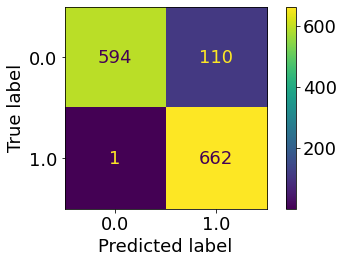

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train_svm, y_train_svm_pred)
save_fig("pizd_+whois_svm_train_cm")
plt.show

#### Confusion Matrix for svm_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_svm_pred = cross_val_predict(svm_clf, X_test_svm, y_test_svm, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_svm, y_test_svm_pred)
cm

array([[249,  45],
       [  0, 293]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test_svm, y_test_svm_pred).round(5)

0.86686

In [ ]:
recall_score(y_test_svm, y_test_svm_pred).round(5)

1.0

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test_svm, y_test_svm_pred).round(5)

0.92868

<function matplotlib.pyplot.show(*args, **kw)>

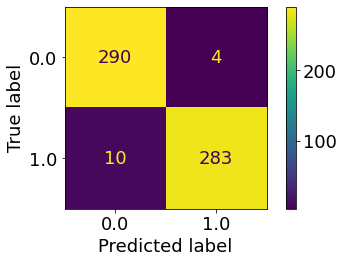

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test_svm, y_test_svm_pred)
save_fig("pizd_+whois_svm_test_cm")
plt.show

### ✅Decision Tree (DT) classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from pprint import pprint
dt_clf = DecisionTreeClassifier()


In [ ]:
print('Parameters currently in use:\n')
pprint(dt_clf.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


In [ ]:
param_grid = {'max_depth': [1, 2, 3, 4, 5,6,7,8,9,10,15,20,30,40,50],
              'max_features': [1, 2, 3, 4,5,6,7,8,9,10],
              'random_state':[0, 1, 2, 3, 4, 5, 10, 15,20,35,50,80,100,150,180,200],
              'criterion':['gini','entropy'],
              }

In [ ]:
#GSCV_dt_clf = GridSearchCV(dt_clf, param_grid=param_grid, cv=10)
#GSCV_dt_clf.fit(X_train, y_train)

In [ ]:
#GSCV_dt_clf.best_params_

In [ ]:
dt_clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features=5, random_state=20)

In [ ]:
dt_clf1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features=5,
                       random_state=20)

In [ ]:
print(f"Decision Tree scored {dt_clf1.score(X_test, y_test).round(5)} on test")
print(f"Decision Tree scored {dt_clf1.score(X_train, y_train).round(5)} on train")

Decision Tree scored 0.97615 on test
Decision Tree scored 0.99415 on train


#### Confusion Matrix for dt_clf1 train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(dt_clf1, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[688,  16],
       [ 19, 644]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.97576

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.97134

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.97354

<function matplotlib.pyplot.show(*args, **kw)>

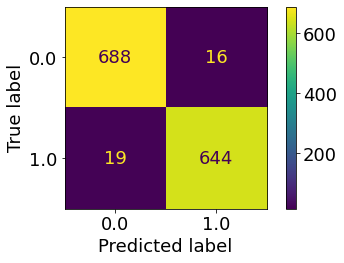

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("pizd_+whois_dt_train_cm")
plt.show

#### Confusion Matrix for dt_clf1 test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(dt_clf1, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[290,   4],
       [  7, 286]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.98621

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.97611

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.98113

<function matplotlib.pyplot.show(*args, **kw)>

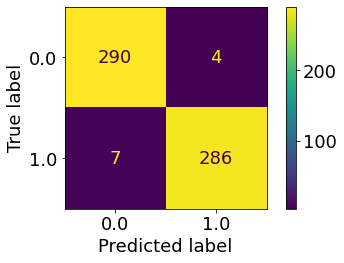

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("pizd_+whois_dt_test_cm")
plt.show

### Bagging Decision Tree (BG) classifier (ensemble)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 
bg_clf=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg_clf.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5)

In [ ]:
print(f"Bagging Decision Tree scored {bg_clf.score(X_test, y_test).round(5)} on test")
print(f"Bagging Decision Tree scored {bg_clf.score(X_train, y_train).round(5)} on train")

Bagging Decision Tree scored 0.97615 on test
Bagging Decision Tree scored 0.99634 on train


#### Confusion Matrix for bg_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(bg_clf, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[686,  18],
       [ 14, 649]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.97301

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.97888

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.97594

<function matplotlib.pyplot.show(*args, **kw)>

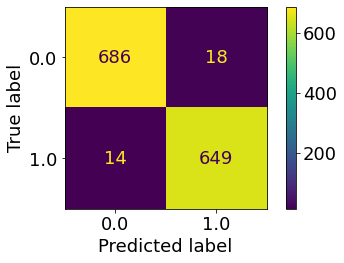

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("pizd_+whois_bg_train_cm")
plt.show

#### Confusion Matrix for bg_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(bg_clf, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[288,   6],
       [  8, 285]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.97938

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.9727

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.97603

<function matplotlib.pyplot.show(*args, **kw)>

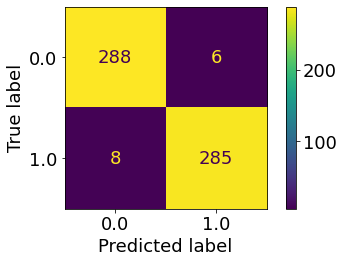

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("pizd_+whois_bg_test_cm")
plt.show

### ✅Boosting Decision Tree (ADB) classifier (ensemble)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [ ]:
adb_clf = AdaBoostClassifier(DecisionTreeClassifier())

In [ ]:
print('Parameters currently in use:\n')
pprint(adb_clf.get_params())

Parameters currently in use:

{'algorithm': 'SAMME.R',
 'base_estimator': DecisionTreeClassifier(),
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}


In [ ]:
param_grid = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]
              }

In [ ]:
#GSCV_adb_clf = GridSearchCV(adb_clf, param_grid=param_grid, scoring='f1', n_jobs=-1)
#GSCV_adb_clf.fit(X_train, y_train)

In [ ]:
#GSCV_adb_clf.best_params_

In [ ]:
adb_clf1 = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=5,max_depth=6),n_estimators=10,learning_rate=0.01)

In [ ]:
adb_clf1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                         min_samples_leaf=5),
                   learning_rate=0.01, n_estimators=10)

In [ ]:
print(f"AdaBoost Classifier scored {adb_clf1.score(X_test, y_test).round(5)} on test")
print(f"AdaBoost Classifier scored {adb_clf1.score(X_train, y_train).round(5)} on train")

AdaBoost Classifier scored 0.97615 on test
AdaBoost Classifier scored 0.99342 on train


#### Confusion Matrix for adb_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(adb_clf1, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[691,  13],
       [ 13, 650]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.98039

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.98039

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.98039

<function matplotlib.pyplot.show(*args, **kw)>

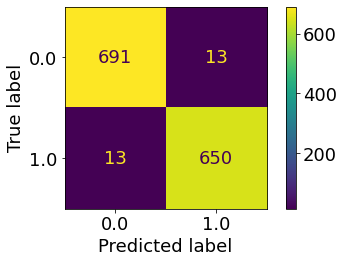

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("pizd_+whois_adb_train_cm")
plt.show

#### Confusion Matrix for adb_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(adb_clf1, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[288,   6],
       [ 10, 283]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.97924

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.96587

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.97251

<function matplotlib.pyplot.show(*args, **kw)>

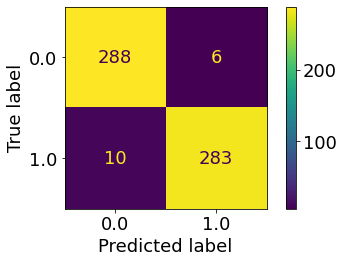

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("pizd_+whois_adb_test_cm")
plt.show

### ✅Random Forest (RF) classifier (ensemble)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
print('Parameters currently in use:\n')
pprint(rf_clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
#GSCV_rf_clf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5)
#GSCV_rf_clf.fit(X_train, y_train)


In [ ]:
#GSCV_rf_clf.best_params_

In [ ]:
rf_clf1 = RandomForestClassifier(random_state=42, max_features='auto', n_estimators=200, \
                                 max_depth=5, criterion='gini')

In [ ]:
rf_clf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

In [ ]:
print(f"Random Forest scored {rf_clf1.score(X_test, y_test).round(5)} on test")
print(f"Random Forest scored {rf_clf1.score(X_train, y_train).round(5)} on train")

Random Forest scored 0.98126 on test
Random Forest scored 0.99195 on train


#### Confusion Matrix for rf_clf1 train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(rf_clf1, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[696,   8],
       [ 14, 649]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.98782

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.97888

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.98333

<function matplotlib.pyplot.show(*args, **kw)>

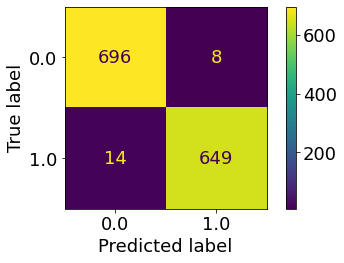

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("pizd_+whois_rf_train_cm")
plt.show

#### Confusion Matrix for rf_clf1 test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(rf_clf1, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[283,  11],
       [  6, 287]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.96309

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.97952

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.97124

<function matplotlib.pyplot.show(*args, **kw)>

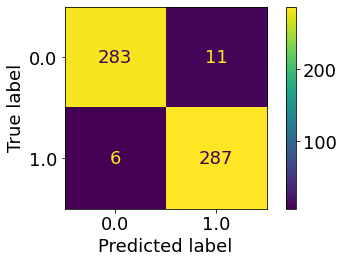

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("pizd_+whois_rf_test_cm")
plt.show

### 👉Receiver Operating Characteristic (ROC) curve

In [ ]:
rndm_probs = [0 for _ in range(len(y_test))]
mnb_probs = mnb_clf.predict_proba(X_test)
lg_probs = lg_clf.predict_proba(X_test)
knn_probs = knn_clf.predict_proba(X_test)
svm_probs = svm_clf1.predict_proba(X_test_svm)
dt_probs = dt_clf1.predict_proba(X_test)
bg_probs = bg_clf.predict_proba(X_test)
adb_probs = adb_clf1.predict_proba(X_test)
rf_probs = rf_clf1.predict_proba(X_test)

In [ ]:
mnb_probs = mnb_probs[:, 1]
lg_probs = lg_probs[:, 1]
knn_probs = knn_probs[:, 1]
svm_probs = svm_probs[:, 1]
dt_probs = dt_probs[:, 1]
bg_probs = bg_probs[:, 1]
adb_probs = adb_probs[:, 1]
rf_probs = rf_probs[:, 1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
rndm_auc = roc_auc_score(y_test, rndm_probs)
mnb_auc = roc_auc_score(y_test, mnb_probs)
lg_auc = roc_auc_score(y_test, lg_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
bg_auc = roc_auc_score(y_test, bg_probs)
adb_auc = roc_auc_score(y_test, adb_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

In [ ]:
print('Random (chance) Prediction: AUROC = %.5f' % (rndm_auc))
print('Naive Bayes: AUROC = %.5f' % (mnb_auc))
print('Logistic Regression: AUROC = %.5f' % (lg_auc))
print('K-Nearest Neighbour: AUROC = %.5f' % (knn_auc))
print('Support Vector Machine: AUROC = %.5f' % (svm_auc))
print('Decision Tree: AUROC = %.5f' % (knn_auc))
print('Bagging Decision Tree: AUROC = %.5f' % (bg_auc))
print('Boosting Decision Tree: AUROC = %.5f' % (adb_auc))
print('Random Forest: AUROC = %.5f' % (rf_auc))

Random (chance) Prediction: AUROC = 0.50000
Naive Bayes: AUROC = 0.98732
Logistic Regression: AUROC = 0.99754
K-Nearest Neighbour: AUROC = 0.99122
Support Vector Machine: AUROC = 0.97097
Decision Tree: AUROC = 0.99122
Bagging Decision Tree: AUROC = 0.99676
Boosting Decision Tree: AUROC = 0.99886
Random Forest: AUROC = 0.99855


In [ ]:
rndm_fpr, rndm_tpr, _ = roc_curve(y_test, rndm_probs)
mnb_fpr, mnb_tpr, _ = roc_curve(y_test, mnb_probs)
lg_fpr, lg_tpr, _ = roc_curve(y_test, lg_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
bg_fpr, bg_tpr, _ = roc_curve(y_test, bg_probs)
adb_fpr, adb_tpr, _ = roc_curve(y_test, adb_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

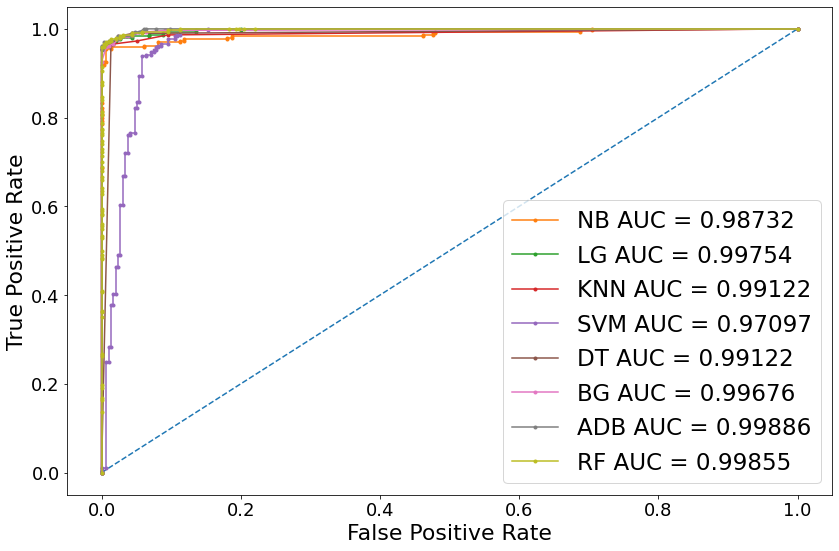

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(rndm_fpr, rndm_tpr, linestyle='--')
plt.plot(mnb_fpr, mnb_tpr, marker='.', label='NB AUC = %0.5f' % mnb_auc)
plt.plot(lg_fpr, lg_tpr, marker='.', label='LG AUC = %0.5f' % lg_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN AUC = %0.5f' % knn_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM AUC = %0.5f' % svm_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='DT AUC = %0.5f' % knn_auc)
plt.plot(bg_fpr, bg_tpr, marker='.', label='BG AUC = %0.5f' % bg_auc)
plt.plot(adb_fpr, adb_tpr, marker='.', label='ADB AUC = %0.5f' % adb_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='RF AUC = %0.5f' % rf_auc)

# Title
#plt.title('ROC Plot', fontsize=22)
# Axis labels
plt.xlabel('False Positive Rate', fontsize=22)
plt.ylabel('True Positive Rate', fontsize=22)
# Show legend
plt.legend(fontsize=23)
# Save Fig
save_fig("pizd_+whois_gscv_roc")
# Show plot
plt.show()